In [22]:
import pandas as pd
import numpy as np
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume($)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[:10]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']


from finta import TA

smad = pd.DataFrame()

periods = [10,50,100,200]

for period in periods:
    smad[period] = getattr(TA, 'SMA')(data, period=period)
    
total_X = smad.copy()
macd = TA.MACD(data)
total_X['MACD'] = macd['MACD']
total_X['SIGNAL'] = macd['SIGNAL']
total_X['DIFF'] = macd['MACD'] - macd['SIGNAL']

total_X['Change'] = data['Close'].diff(periods=12) / data['Close']

2020-06-01.csv
2020-06-02.csv
2020-06-03.csv
2020-06-04.csv
2020-06-05.csv
2020-06-06.csv
2020-06-07.csv
2020-06-08.csv
2020-06-09.csv
2020-06-10.csv


In [23]:
def test_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    print("training: ", clf.score(X_train, y_train))
    print("testing: ", clf.score(X_test, y_test))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xy = total_X.dropna()
X, y = Xy.drop(['Change'], axis=1), Xy['Change']

X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

test_clf(LinearRegression(), X_train, y_train, X_test, y_test)

training:  0.9287379823077125
testing:  0.9075174285844486


In [26]:
from sklearn.tree import DecisionTreeRegressor

test_clf(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

training:  0.9992789526270963
testing:  0.8757368095454294


In [27]:
from sklearn.ensemble import RandomForestRegressor

test_clf(RandomForestRegressor(), X_train, y_train, X_test, y_test)

training:  0.985074063678009
testing:  0.9353876321161624


In [28]:
lin_clf = LinearRegression()
lin_clf.fit(X_train, y_train)
lin_clf.score(X_train, y_train)

0.9287379823077125

In [29]:
preds = lin_clf.predict(X_train) * -1
scores = preds + np.array(y_train)

-0.004702618325748397
-0.01618067573934586


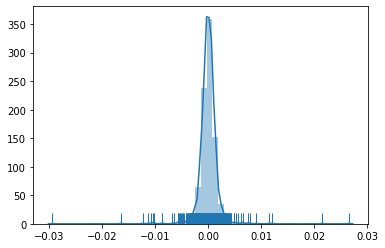

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(scores, rug=True)
print(np.percentile(scores, .95))
print(np.percentile(scores, .05))